# Object Oriented Programming

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# Write a function to take the first $n$ squares

## My way

In [5]:
def squared(n):
    return np.arange(1, n+1)**2

In [6]:
squared(5)

array([ 1,  4,  9, 16, 25])

## Functional programming

In [7]:
sq = lambda n: [i**2 for i in range(1, n+1)]

print(sq(5)) # note that functional programming doesn't like "side effects"

[1, 4, 9, 16, 25]


## Objects

In [14]:
class Number():
    def __init__(self, value):
        self.value = value
    def squared(self):
        self.square = self.value**2
        return self.square
    

In [16]:
print([Number(i).squared() for i in range(1, 6)])

[1, 4, 9, 16, 25]


# Classes and instances

In [18]:
# this is a class
class Observation():          # "object" and "class" are interchangable
    def __init__(self, data): # constructor method
        self.data = data      # attribute
    
    def average(self):        # another method
        return np.average(self.data)

In [23]:
# these are instances

obs1 = Observation([0, 1, 2])
obs2 = Observation([3, 4, 5])

In [24]:
print(f'Average 1 = {obs1.average():e}; Average 2 = {obs2.average():e}')
print(f'Type of avg 1 = {type(obs1)}; Type of avg 2 = {type(obs2)}')

Average 1 = 1.000000e+00; Average 2 = 4.000000e+00
Type of avg 1 = <class '__main__.Observation'>; Type of avg 2 = <class '__main__.Observation'>


In [26]:
# these are attributes of the class instances

print(obs1.data)
print(obs2.data)

[0, 1, 2]
[3, 4, 5]


# Inheritance

In [53]:
class TimeSeries(Observation):   # inherits all the methods from Observation
    def __init__(self, time, data):
        self.time = time
        super().__init__(data)   # or Observation.__init__(self, data), but that's a bit brittle
        if len(self.time) != len(self.data):
            raise ValueError("Time and data must have same length")
    
    @property
    def stop_time(self):
        return self.time[-1]     # aka the final time

In [51]:
t = TimeSeries([0.2, 0.4, 0.6], [3, 6, 3])

In [55]:
t # tells you where it's defined, its object, and memory address of this instance

In [52]:
# I made this an attribute
t.stop_time

0.6

In [56]:
t.average()

4.0

In [64]:
# just for fun
print(print)

<built-in function print>


# Matplotlib as OOP

In [74]:
x = np.linspace(0, 2*np.pi, 1000)         # independent var
y_hat = np.sinc(x)                        # model
y = y_hat + np.random.randn(1000) * 0.3   # observation

Text(0, 0.5, 'Residual')

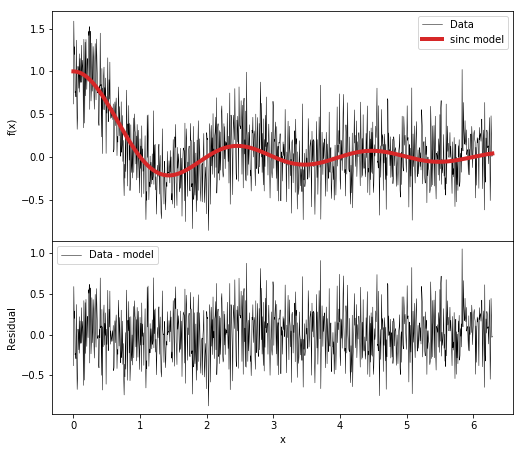

In [79]:
fig = plt.figure(figsize=(8, 8))
ax_data = fig.add_axes([0.1, 0.4, 0.8, 0.4])
ax_residual = fig.add_axes([0.1, 0.1, 0.8, 0.3])

ax_data.plot(x, y, c='k', lw=0.5, label='Data')
ax_data.plot(x, y_hat, c='C3', lw=4, label='sinc model')
ax_data.legend()
ax_data.set_ylabel('f(x)')

ax_residual.plot(x, y - y_hat, c='k', lw=0.5, label='Data - model')
ax_residual.legend()
ax_residual.set_xlabel('x')
ax_residual.set_ylabel('Residual')